In [210]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
import pickle

import sklearn

In [211]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import Dummy Regressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [212]:
df = pd.read_csv('/Users/sheenaschier/Documents/Workdir/datasets/ENR_GRD.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [213]:
highschool = df.highschool == 'True'
enroll = df.enr_tot > 0
df_highschool = df[highschool & enroll].drop(columns=['D9', 'D10', 'D11', 'D12'])

print(len(df_highschool))
print (df_highschool)

1976
            CDS_CODE   COUNTY                            DISTRICT  \
3      1100170109835  Alameda  Alameda County Office of Education   
4      1100170112607  Alameda  Alameda County Office of Education   
6      1100170130401  Alameda  Alameda County Office of Education   
7      1100170130419  Alameda  Alameda County Office of Education   
8      1100170130427  Alameda  Alameda County Office of Education   
27     1611270130294  Alameda                 Albany City Unified   
28     1611270130450  Alameda                 Albany City Unified   
32     1611430131177  Alameda                    Berkeley Unified   
33     1611430134924  Alameda                    Berkeley Unified   
39     1611500102194  Alameda               Castro Valley Unified   
41     1611500132225  Alameda               Castro Valley Unified   
42     1611500135533  Alameda               Castro Valley Unified   
47     1611680132746  Alameda                       Emery Unified   
51     1611760130062  Alameda

In [214]:
df_play = df_highschool[['GRADRATE', 'whi_f_ratio', 'whi_m_ratio', 'afr_f_ratio', 'afr_m_ratio', 'his_f_ratio', 'his_m_ratio', 'asi_f_ratio', 'asi_m_ratio', 'nat_f_ratio', 'nat_m_ratio', 'pac_f_ratio', 'pac_m_ratio', 'fil_f_ratio', 'fil_m_ratio', 'not_f_ratio', 'not_m_ratio', 'mul_f_ratio', 'mul_m_ratio']]



In [215]:
df_play.describe()

,GRADRATE,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,73.444534,0.151930,0.180634,0.037075,0.043369,0.218125,0.254896,0.009072,0.010643,0.024066,0.027796,0.002815,0.003671,0.007866,0.009485,0.008434,0.010124,0.006844,0.007992
std,24.034843,0.134179,0.147571,0.057085,0.067652,0.143123,0.164676,0.030025,0.037149,0.046347,0.050050,0.005632,0.014475,0.016328,0.019208,0.037962,0.045990,0.015363,0.019929
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.300000,0.033291,0.050000,0.003800,0.005259,0.101204,0.115630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82.300000,0.117262,0.147884,0.015504,0.019183,0.201911,0.237486,0.001788,0.002222,0.007804,0.010013,0.000559,0.000835,0.002436,0.003252,0.000000,0.000000,0.000386,0.000607
75%,92.700000,0.251727,0.289214,0.046616,0.053047,0.317907,0.379686,0.005705,0.006462,0.025000,0.030861,0.003434,0.003829,0.009354,0.011037,0.002812,0.003962,0.007011,0.007905
max,99.800000,0.800000,0.800000,0.535211,0.821429,1.000000,1.000000,0.500000,0.666667,0.388344,0.440075,0.090909,0.500000,0.206304,0.244126,0.465969,0.909091,0.267782,0.333333


In [216]:
correlations = df_play.corr()

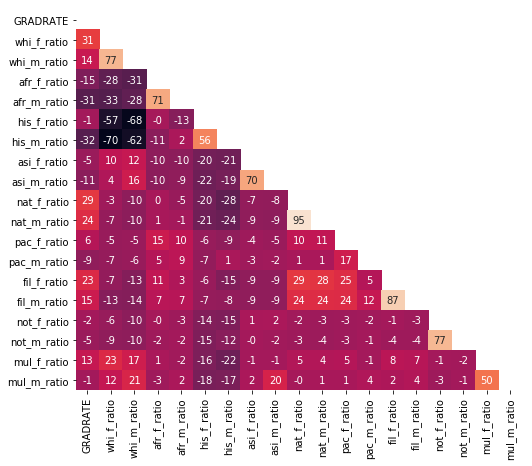

In [217]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,7))

# Plot heatmap of correlations
corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)
fig = corr_heat.get_figure()
fig.savefig('corr_heat.png')
#with open('corrheat.pkl', 'wb') as f:
#    pickle.dump(corr_heat, f)

In [218]:
y = df_play.GRADRATE
X = df_play.drop('GRADRATE', axis=1)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234)


print( len(X_train), len(X_test), len(y_train), len(y_test) )

1580 396 1580 396


In [220]:
X_train.describe()

,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,0.149860,0.178694,0.037845,0.044896,0.218235,0.256682,0.009107,0.010703,0.024268,0.028035,0.002876,0.003849,0.007919,0.009554,0.007985,0.009492,0.006626,0.007706
std,0.132343,0.146658,0.057094,0.070575,0.144342,0.165168,0.031248,0.039388,0.046687,0.050528,0.005816,0.015941,0.016729,0.019814,0.036543,0.044044,0.014031,0.019227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033291,0.050714,0.003833,0.005583,0.100480,0.115042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.114834,0.143850,0.015504,0.019507,0.204111,0.241067,0.001773,0.002245,0.007926,0.010241,0.000572,0.000853,0.002459,0.003242,0.000000,0.000000,0.000399,0.000565
75%,0.250000,0.287300,0.048695,0.054268,0.319783,0.382295,0.005615,0.006306,0.025010,0.031477,0.003467,0.003906,0.009248,0.011118,0.002812,0.004013,0.006953,0.007685
max,0.615385,0.655172,0.476309,0.821429,1.000000,1.000000,0.500000,0.666667,0.385300,0.440075,0.090909,0.500000,0.206304,0.244126,0.465380,0.909091,0.142857,0.333333


In [221]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
    'drm'   : make_pipeline(StandardScaler(), DummyRegressor(strategy='mean')),
    'drq'   : make_pipeline(StandardScaler(), DummyRegressor(strategy='quantile', quantile=0.5)) 

}


In [222]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
drm <class 'sklearn.pipeline.Pipeline'>
drq <class 'sklearn.pipeline.Pipeline'>


In [75]:
pipelines['lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [228]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}


# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200, 500, 1000, 10000],
    #'randomforestregressor__n_estimators' : [100, 500],
    'randomforestregressor__max_features': ['auto', 0.2, 'sqrt', 0.33, 0.5],
}



# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200, 500, 1000],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

#Dummy regressor enpty parameters
drm_hyperparameters = {}
drq_hyperparameters = {}


In [229]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'drm'  : drm_hyperparameters,
    'drq'  : drq_hyperparameters
}

In [230]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso', 'drm', 'drq']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
drm was found in hyperparameters, and it is a grid.
drq was found in hyperparameters, and it is a grid.


In [103]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, refit=True, n_jobs=-1)

In [104]:
# Fit and tune model
model.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
#print(model.best_estimator_.steps[1][1].feature_importances_)
print(model.best_estimator_.steps[1][1])
#print(pipelines['lasso'].best_estimator_.steps[1][1])

DummyRegressor(constant=None, quantile=0.5, strategy='quantile')


In [231]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, refit=True, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

lasso has been fitted.
ridge has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

enet has been fitted.
rf has been fitted.
gb has been fitted.
drm has been fitted.
drq has been fitted.


In [232]:
# Check that we have 7 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) ) 

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
drm <class 'sklearn.model_selection._search.GridSearchCV'>
drq <class 'sklearn.model_selection._search.GridSearchCV'>


In [233]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
drm has been fitted.
drq has been fitted.


In [234]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )
    print(model.best_estimator_)
    #print(name, model.best_estimator_.steps[1][1])



lasso 0.305411640519
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])
ridge 0.291328162466
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])
enet 0.301505491388
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=123, selection='cyclic', tol=0.0001, warm_start=False))])
rf 0.482920585833
Pipelin

whi_f_ratio 0.079478790304
whi_m_ratio 0.0562474367535
afr_f_ratio 0.0597735328397
afr_m_ratio 0.113931336457
his_f_ratio 0.0685152103621
his_m_ratio 0.0832890375353
asi_f_ratio 0.0566977239139
asi_m_ratio 0.0455752142302
nat_f_ratio 0.091631136936
nat_m_ratio 0.0428089434178
pac_f_ratio 0.0318836784592
pac_m_ratio 0.0299665256939
fil_f_ratio 0.0833935716578
fil_m_ratio 0.0484246092606
not_f_ratio 0.0223367692042
not_m_ratio 0.0276896148834
mul_f_ratio 0.032030249262
mul_m_ratio 0.0263266188295
[10, 8]


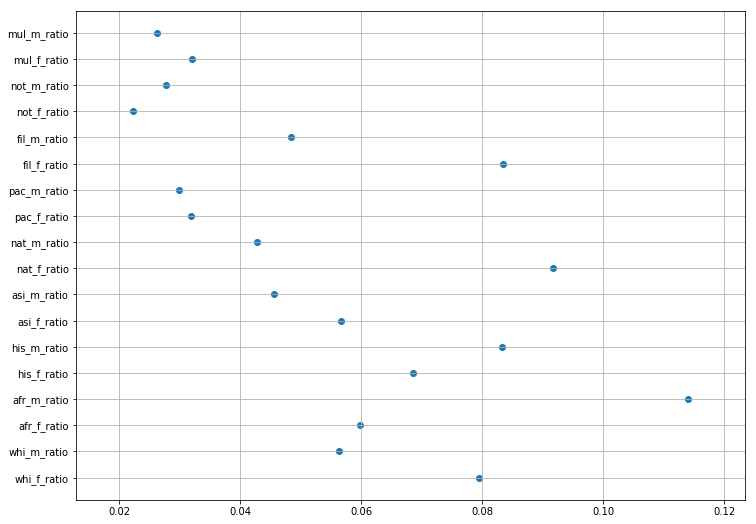

In [242]:
importances = fitted_models['rf'].best_estimator_.steps[1][1].feature_importances_
for feat, importance in zip(X.columns, importances):
    print(feat, importance)
plt.scatter(importances, X.columns,)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
print(fig_size)
plt.grid()
plt.show()
#df_feat = pd.DataFrame({'x':[X.columns], 'y':[fitted_models['rf'].best_estimator_.steps[1][1].feature_importances_]})
#print(df_feat)
#plt.plot(df_feat.x, df_feat.y)

In [243]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print( 'RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

lasso
--------
R^2: 0.26181927917
MAE: 15.6222682529
RMSE: 19.7029265773
ridge
--------
R^2: 0.263042069433
MAE: 15.5459606516
RMSE: 19.6866009462
enet
--------
R^2: 0.266966861402
MAE: 15.6237784055
RMSE: 19.634108831
rf
--------
R^2: 0.436293538704
MAE: 12.7332413173
RMSE: 17.2177301179
gb
--------
R^2: 0.415759909745
MAE: 12.8417522603
RMSE: 17.5285126777
drm
--------
R^2: -0.00240451558688
MAE: 18.8544591484
RMSE: 22.9599478294
drq
--------
R^2: -0.124953369536
MAE: 18.0505050505
RMSE: 24.3229725763


[ 80.3466      66.8587      75.93        82.4363      94.3461      61.3757
  81.5635      80.8958      88.0127      86.48        74.8934      73.6616
  81.4334      61.8404      73.8985      88.7547      91.8156      85.6947
  95.6177      53.43456     81.8444      83.4611      77.2805      64.856
  36.2854      72.8589      91.1857      85.4664      91.0166      53.3082
  86.5074      85.3144      73.4712      70.8492      89.4982      68.2608
  90.871       66.5604      62.4647      91.7149      90.7347      79.0378
  39.27631333  89.4859      79.7476      68.3311      76.0575      67.751
  71.1611      86.3285      40.0312      79.5415      81.9534      84.7175
  92.5902      86.9709      90.3485      92.7787      59.4442      45.8966
  66.5903      83.6595      56.4976      86.4242      80.711       79.0629
  84.4524      76.9827      62.9197      51.484       83.8957      76.6417
  71.54072     84.113       91.2073      65.7802      86.5669      75.3914
  57.8774      67.8394     

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


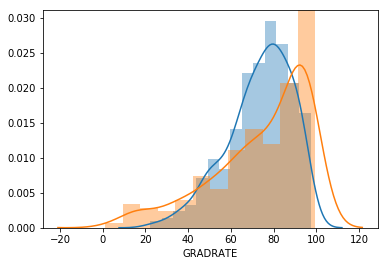

In [37]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)
print(pred)
sns.distplot(pred)
sns.distplot(y_test)
plt.savefig('gradrate_predVStrue.png')

In [58]:
fitted_models['rf'].
#sns.distplot(fi)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances'

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


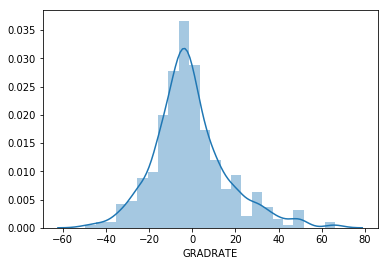

In [38]:
#print(pred-y_test)
sns.distplot(pred-y_test)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


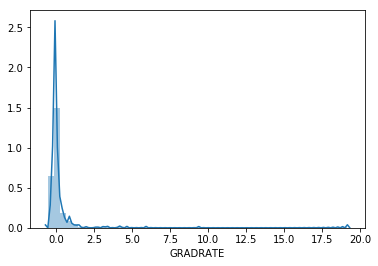

In [189]:
sns.distplot((rf_pred-y_test)/y_test)


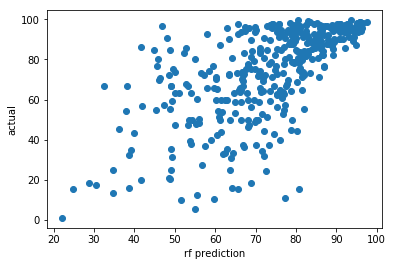

In [188]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('rf prediction')
plt.ylabel('actual')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


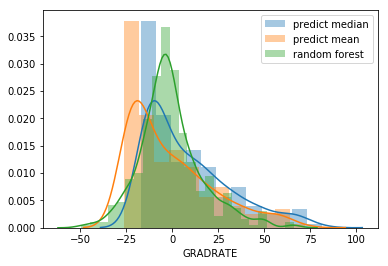

In [206]:
# Predict test set using fdummy models
drm_pred = fitted_models['drm'].predict(X_test)
drq_pred = fitted_models['drq'].predict(X_test)
sns.distplot(drq_pred-y_test, label= "predict median")
sns.distplot(drm_pred-y_test, label= "predict mean")
sns.distplot(rf_pred-y_test, label= "random forest")
plt.legend()
#sns.distplot(drm_pred-y_test/y_test)
#sns.distplot((pred-y_test)/y_test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


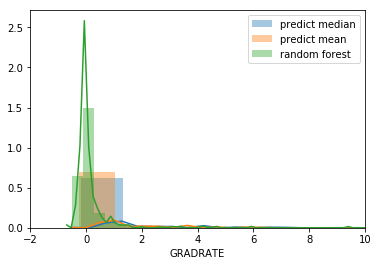

In [207]:
sns.distplot((drq_pred-y_test)/y_test, label= "predict median",  )
sns.distplot((drm_pred-y_test)/y_test, label= "predict mean")
sns.distplot((rf_pred-y_test)/y_test, label= "random forest")
plt.xlim(-2, 10)
plt.legend()

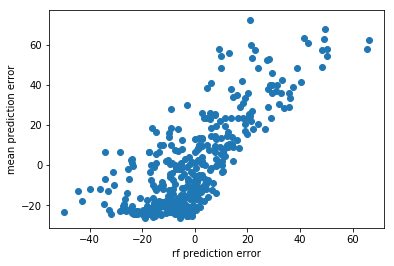

In [208]:
plt.scatter(rf_pred-y_test, drm_pred-y_test)
plt.ylabel('mean prediction error')
plt.xlabel('rf prediction error')
plt.show()

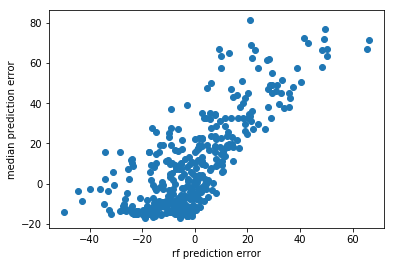

In [209]:
plt.scatter(rf_pred-y_test, drq_pred-y_test)
plt.ylabel('median prediction error')
plt.xlabel('rf prediction error')
plt.show()